# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Amirahmad Shafiee
2.   Student Number: 99104027


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("./data/data01.csv")
# implement the split part
# name them: x_train, x_test, y_train, y_test
X = np.array(dataset['X']).reshape((dataset.shape[0],1))
Y = np.array(dataset['Y']).reshape((dataset.shape[0],1))
filter = np.random.choice(dataset.index , size = X.shape[0] , replace = False)
x_train = X[filter[:np.int64(X.shape[0] * 0.8)]]
y_train = Y[filter[:np.int64(X.shape[0] * 0.8)]]

x_test = X[filter[np.int64(X.shape[0] * 0.8):]]
y_test = Y[filter[np.int64(X.shape[0] * 0.8):]]

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A = np.concatenate((x_train,np.ones(x_train.shape)),axis=1)
m = np.dot(np.linalg.inv(np.dot(A.T , A)),np.dot(A.T,y_train)) 

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_true = y_train , y_pred = predicted_train_y)
test_error = mean_squared_error(y_true=y_test , y_pred = predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.344174717205666
MSE test error: 0.27626611946670215


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

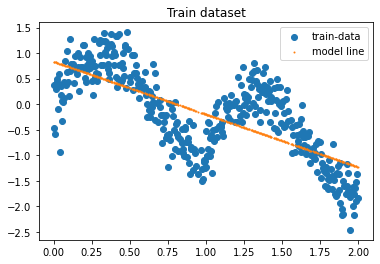

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")
plt.legend(['train-data' , 'model line'])

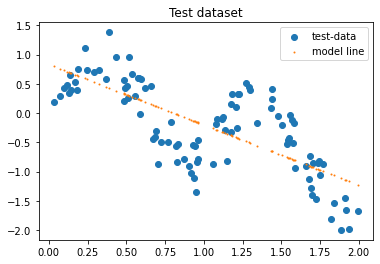

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")
plt.legend(['test-data' , 'model line'])

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

Answer :
The model has done its job, meaning that using this specific model, the result was acceptable and it shows the flow of data in a satisfying way, but the problem here is the simplicity, looks like the dataset has a polynomial distribution. so we are dealing with an underfitting problem.
Using a more complex model, e.g. SVM with polynomial kernel from a 4th or 5th degree would be appreciated and seems like to be somewhat the perfect solution to not have to deal with overfitting problems afterwards.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes, because of the distribution of data, it looks like that multiple local linear models would perfom in a satisfying way.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(np.sum((xi - the_query_point) ** 2 , axis=0)/(-2 * (hyperparameter * 2)))
    return W

In [8]:

def local_weighted_regression(query, X, Y, hyperparameter):
	
	query = np.r_[1, query]
	X = np.c_[np.ones(len(X)), X]
	
	xw = X.T * weights_calculate(query, X, hyperparameter)
	theta = np.linalg.pinv(xw @ X) @ xw @ Y
	
	return query @ theta

def weights_calculate(query, X, hyperparameter):
	return np.exp(np.sum((X - query) ** 2, axis=1) / (-2 * (hyperparameter **2) ))



Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [9]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.c_[np.ones(l),train_X]
    qx = np.r_[1,query_x]
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.linalg.pinv(train_X.T @ W @ train_X) @ np.dot(train_X.T,W) @ train_Y
    
    return np.dot(qx , theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [10]:
predicted_test = [local_weighted_regression( query,x_train, y_train, 0.1) for query in x_test]
error = mean_squared_error(y_true=y_test , y_pred = predicted_test)
print(f"MSE test error: {error}")

MSE test error: 0.0770809934557886


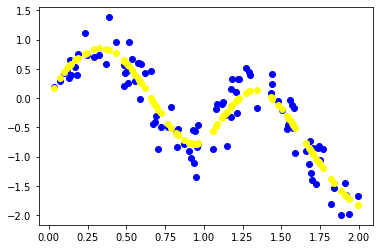

In [11]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes it is. In this model , not just the overall flow of data is learnt, but also the shape and distribution, is shown in an almost perfect way.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

depending on the hyperparameters we tune, better performance than the simple linear regression but worse than localy weighted linear regression is expected.

### Part10:
Implementing the `KNN model`.

In [12]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = abs(x1-x2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        distances = [self.distance(x1 ,x ) for x1 in self.X]
        indices = [] # find indices of k nearest neighbours to x
        for i in range(self.k):
            index = np.argmin(distances)
            indices.append(index)
            distances.pop(index)
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y =  np.mean(self.Y[neareest_indices])
        return predicted_y

In [13]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test , predicted_y)
    return error, predicted_y

In [16]:
k = 1
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.15758019510714041


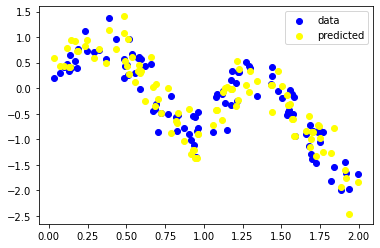

In [17]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")
plt.legend(['data' , 'predicted'])

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

It did perform well, and it was so well expected due to the train and test data being from the almost exact same distribution.